# Pima-indian 당뇨병 데이터 예측

1. 결과를 submission.csv 에 학습 라벨 병합해 제출
1. 강사가 각 팀별 제출 submission.csv 를 accuracy 점수로 평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Data

- Pregnancies : 임신횟수
- Glucose : 포도당 농도
- BloodPressure : 혈압
- SkinThickness : 피부 두께
- Insulin : 인슐린
- BMI : 체질량지수
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

In [3]:
train = pd.read_csv('./1.diabetes_train.csv')
test = pd.read_csv('./2.diabetes_test.csv')
submission = pd.read_csv('./3.diabetes_submission.csv')

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ---

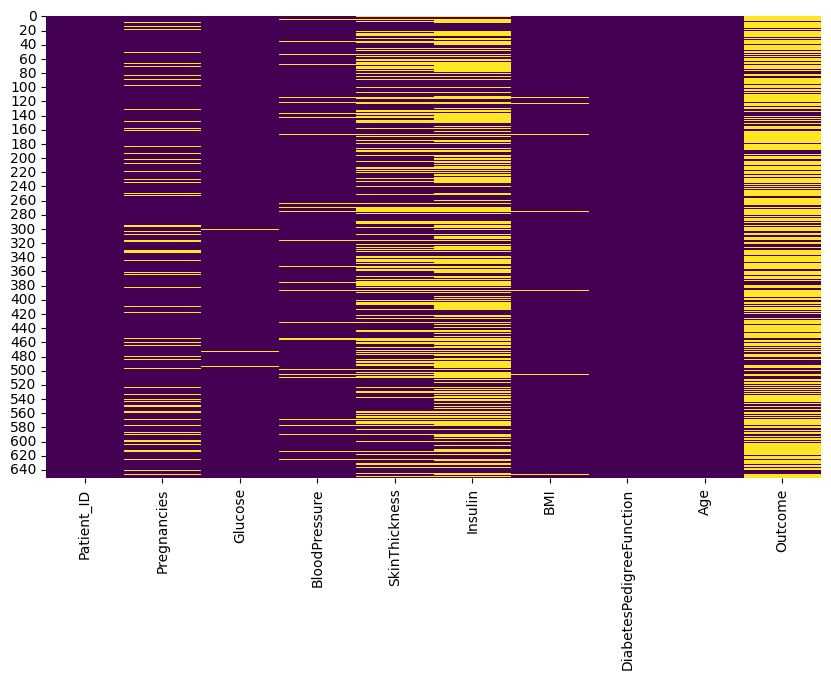

In [ ]:
# isnull().sum()으로 확인했을 때 결측치가 없었으나 0으로 처리된 것들이 있었으므로,
# 0을 결측치로 간주하고 확인


# 히트맵 시각화
plt.figure(figsize=(10, 6))

plt.show()

In [5]:
train_zero.isna().sum()

Patient_ID                    0
Pregnancies                  93
Glucose                       4
BloodPressure                33
SkinThickness               193
Insulin                     316
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     423
dtype: int64

In [6]:
# Pregnancies와 Outcome은 0이 결측치가 아니므로 무시.
# Glucose, BloodPressure, SkinThickness, Insulin, BMI만 처리해주면 될 듯 하다.

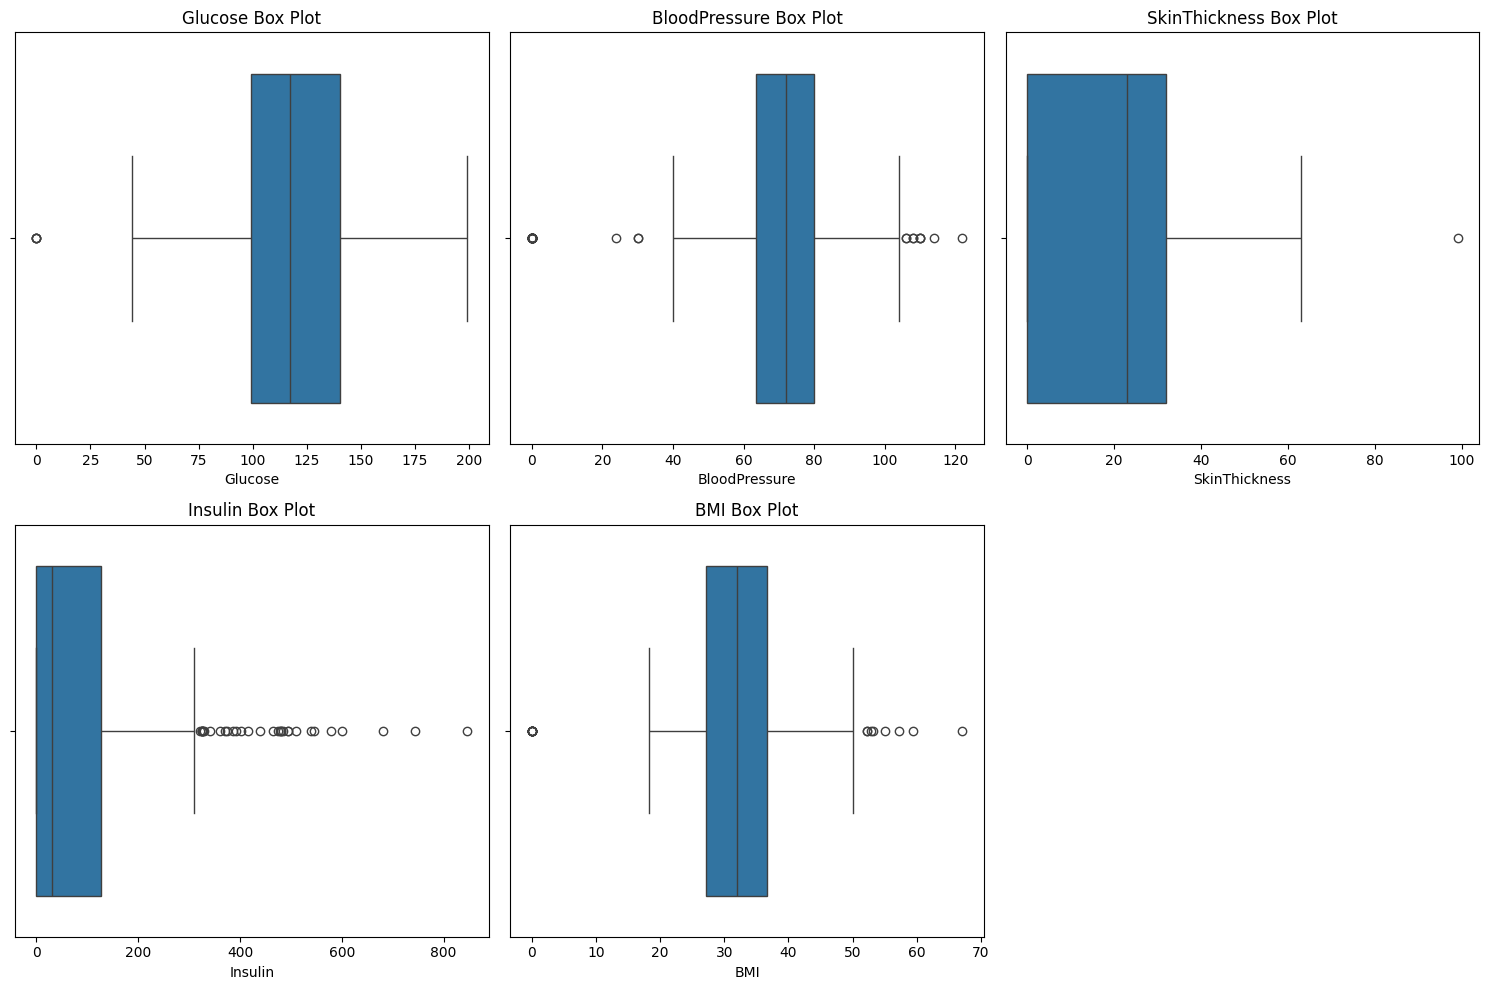

In [ ]:
# 박스플롯을 이용한 이상치 확인
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):


    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
# Glucose, BloodPressure, SkinThickness, Insulin, BMI에 이상치도 존재한다.

# 공복일 때 인슐린 수치가 0일 수도 있다는 정보를 찾아, 인슐린은 0을 결측치로 처리하면 안될듯.
# 300부터 이상치로 잡히는데, 당뇨 환자의 경우 600까지도 잡히므로 수치가 많이 잡히는 500까지는 이상치로 처리하면 안될듯.



# BMI는 50 이상이려면 170cm에 150kg이상이여야한다.
# 실제 데이터일 수 있지만 예외적 케이스이므로 이상치 처리해주는게 맞을듯.




# BloodPressure은 저혈압, 고혈압이 이상치로 잡힌 듯 하다.
# 당뇨에 영향이 있을 수 있으므로 0만 이상치라고 판단.




# Glucose는... 0일수가 있나? 값도 적고 Outcome도 달라서 이상치로 간주




/tmp/ipykernel_254212/1376197768.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train['Insulin'] >= 500, 'Insulin'] = insulin
/tmp/ipykernel_254212/1376197768.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[test['Insulin'] >= 500, 'Insulin'] = insulin


In [ ]:
# SkinThickness가 90이상인 이상치가 99로 되어있다.
# 대충 직감으로 9의 오타라고 생각하고 9로 바꿔주자.



      Patient_ID  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
435  Patient_580            2      197             70             99      0.0   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
435  34.7                     0.575   62        1  


In [ ]:



print (skin90) #잘 처리됐음

Empty DataFrame
Columns: [Patient_ID, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


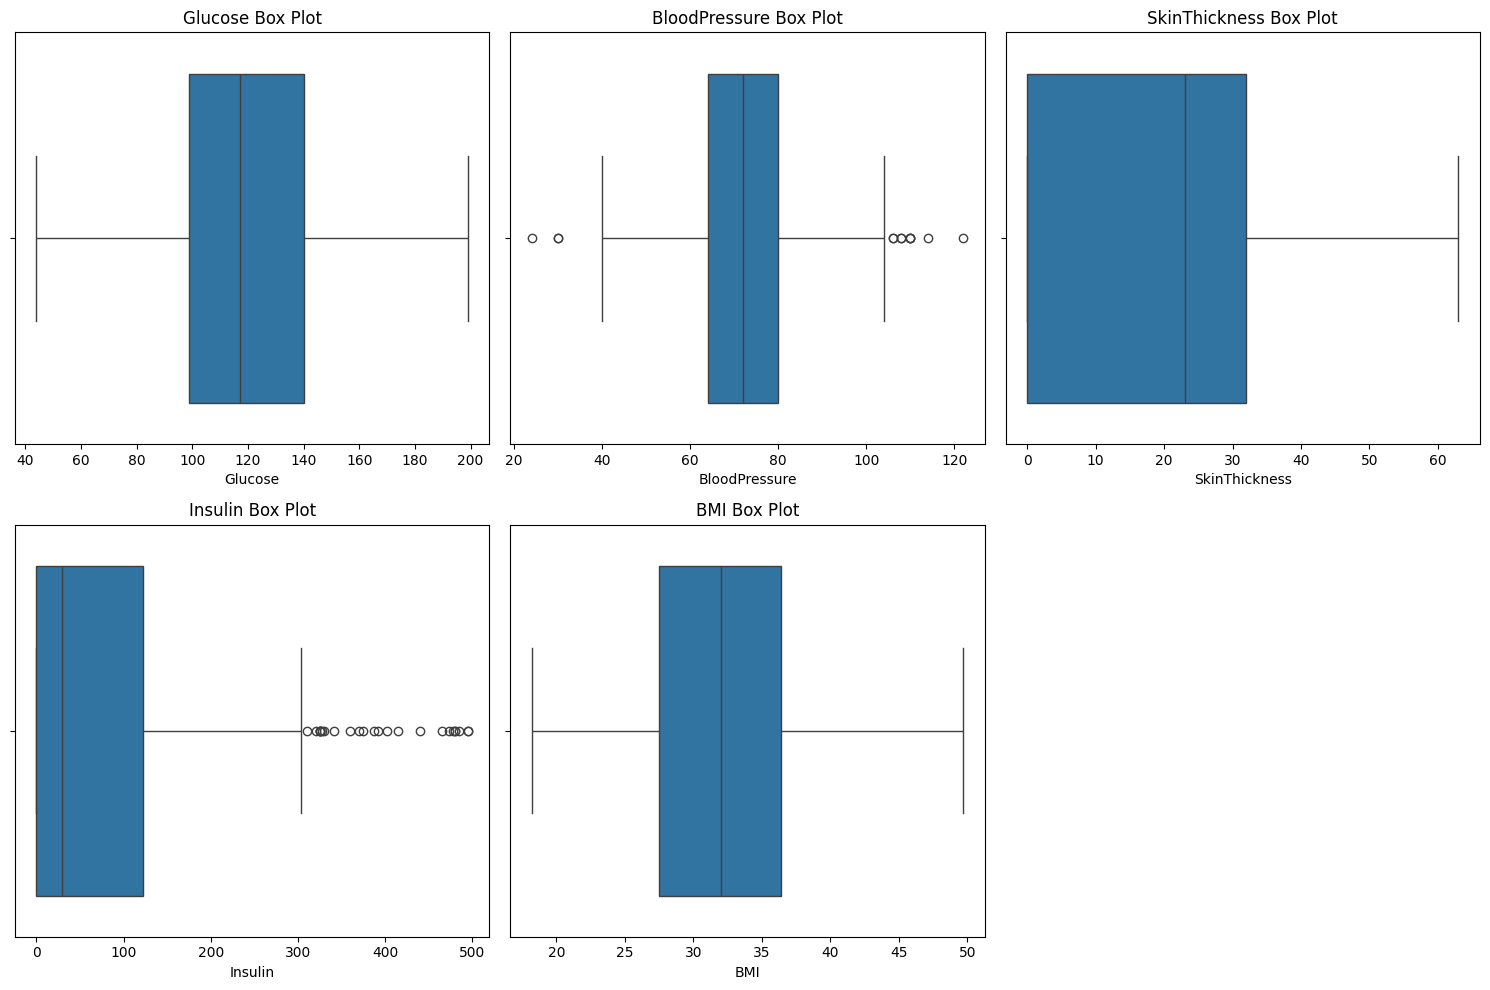

In [ ]:
# 다시 확인. 만약 결과가 이상하면 그 때 이상치를 다 없애는걸로...
# + 4차 : 이상치를 모두 제거해봤는데 점수가 더 낮아진다. 이걸로 유지.

plt.figure(figsize=(15, 10))

for i, column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):


    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
# feature와 target 분리






In [ ]:
# 데이터 분할




In [ ]:
# 스케일러




In [ ]:
# xgboost 학습


In [ ]:
# 5-Fold CV






Cross-validation scores: [0.75       0.76923077 0.76923077 0.76923077 0.71428571]
Mean cross-validation : 0.7543956043956044


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Threshold 튜닝




In [ ]:
# classification_report



              precision    recall  f1-score   support

           0       0.77      0.83      0.80       124
           1       0.66      0.57      0.61        72

    accuracy                           0.73       196
   macro avg       0.71      0.70      0.71       196
weighted avg       0.73      0.73      0.73       196



In [ ]:
# 최종 테스트 데이터 예측 및 저장





### Submission 점수 확인

- 실제 사이트에 제출하는 것 처럼
- 제출한 `submission.csv` 를 정답 레이블 데이터와 accuracy 평가